C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9272\3180430260.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["crash_date"] = pd.to_datetime(df["crash_date"], errors="coerce")


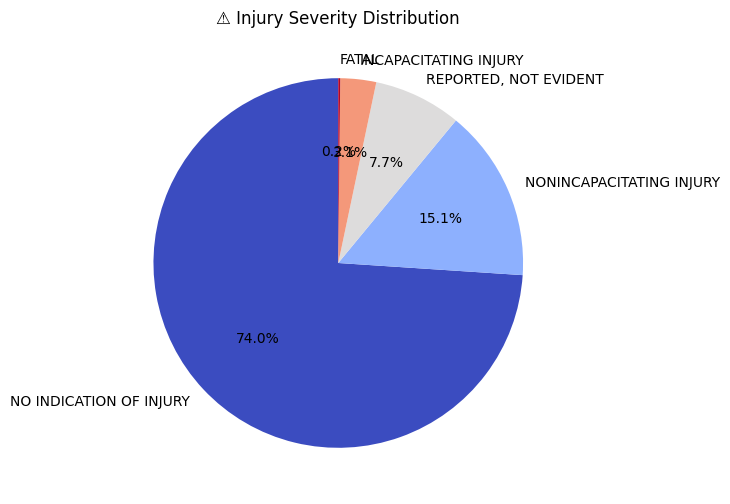

C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128338 (\N{CLOCK FACE THREE OCLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


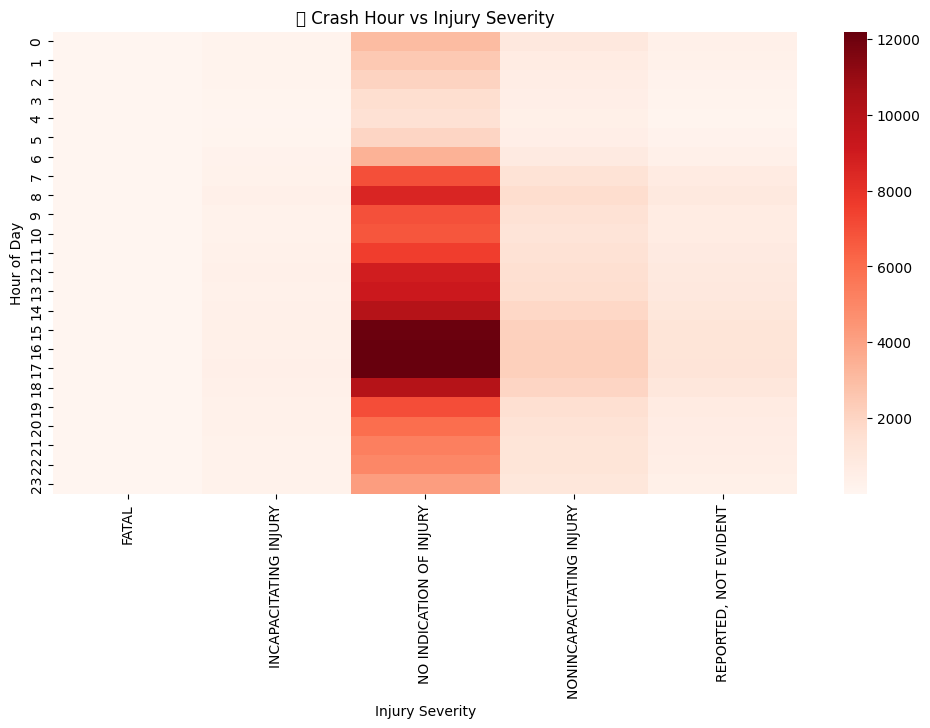

C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127782 (\N{WHITE SUN BEHIND CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


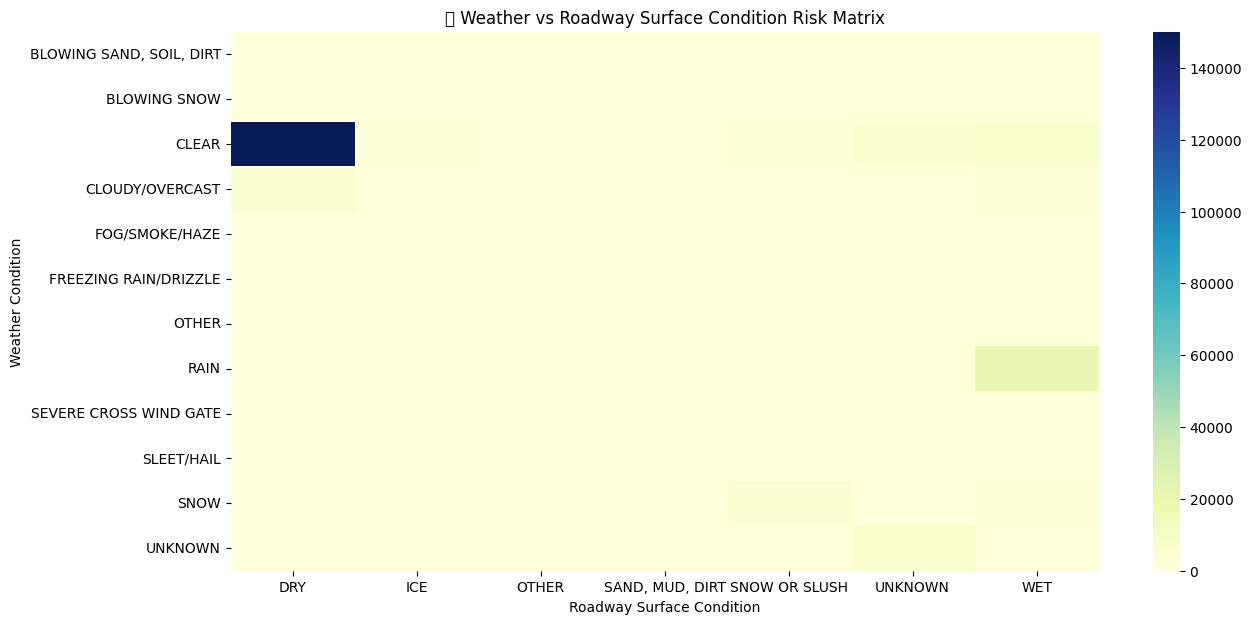

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9272\3180430260.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="lighting_condition", order=df["lighting_condition"].value_counts().index, palette="plasma")
C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


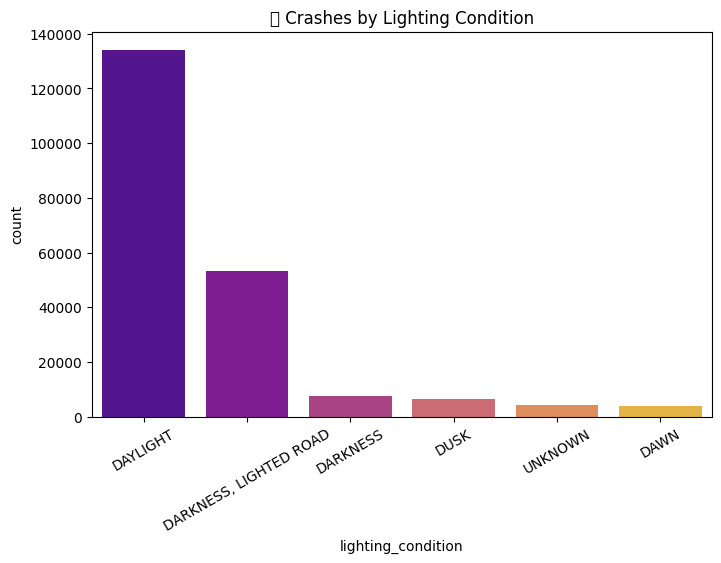

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9272\3180430260.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=injury_by_type.values, y=injury_by_type.index, palette="inferno")
C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


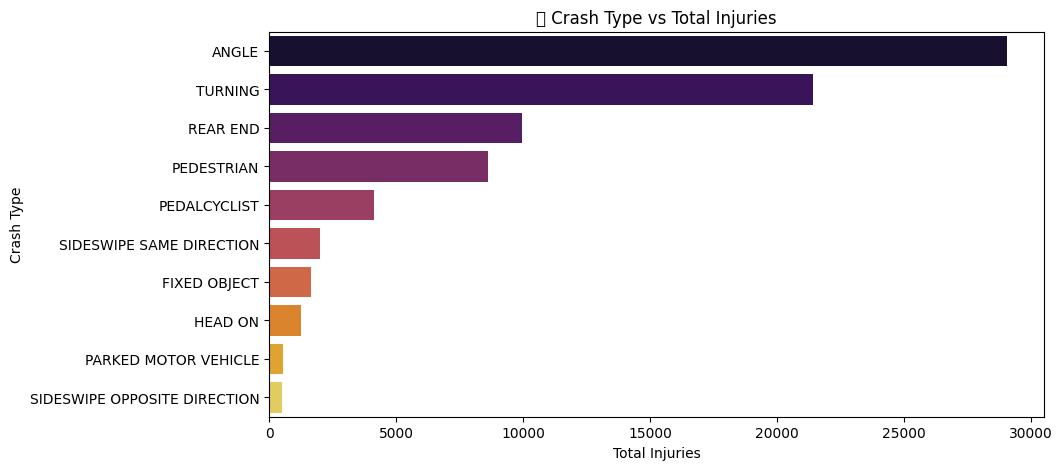


🔥 Top 10 High-Risk Factor Combinations:
     weather_condition roadway_surface_cond      lighting_condition  Counts
22              CLEAR                  DRY                DAYLIGHT  101918
20              CLEAR                  DRY  DARKNESS, LIGHTED ROAD   36538
202              RAIN                  WET                DAYLIGHT   10925
200              RAIN                  WET  DARKNESS, LIGHTED ROAD    7256
19              CLEAR                  DRY                DARKNESS    4704
23              CLEAR                  DRY                    DUSK    4205
62    CLOUDY/OVERCAST                  DRY                DAYLIGHT    3930
56              CLEAR                  WET                DAYLIGHT    3720
50              CLEAR              UNKNOWN                DAYLIGHT    3508
290           UNKNOWN              UNKNOWN                 UNKNOWN    3409


In [6]:
# 📌 Traffic Accident Analysis (SkillCraft Task 04) – Innovative Insights
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("traffic_accidents.csv")

# Convert crash_date to datetime & extract hour
df["crash_date"] = pd.to_datetime(df["crash_date"], errors="coerce")
df["Hour"] = df["crash_date"].dt.hour

# =========================
# 1. Severity Distribution
# =========================
plt.figure(figsize=(6,6))
severity_counts = df["most_severe_injury"].value_counts().head(6)
severity_counts.plot(kind="pie", autopct="%1.1f%%", startangle=90, cmap="coolwarm")
plt.title("⚠️ Injury Severity Distribution")
plt.ylabel("")
plt.show()

# =========================
# 2. Crash Hour vs Injury Heatmap
# =========================
plt.figure(figsize=(12,6))
heatmap_data = pd.crosstab(df["Hour"], df["most_severe_injury"])
sns.heatmap(heatmap_data, cmap="Reds")
plt.title("🕒 Crash Hour vs Injury Severity")
plt.xlabel("Injury Severity")
plt.ylabel("Hour of Day")
plt.show()

# =========================
# 3. Weather + Road Surface Risk Matrix
# =========================
plt.figure(figsize=(14,7))
risk_matrix = pd.crosstab(df["weather_condition"], df["roadway_surface_cond"])
sns.heatmap(risk_matrix, cmap="YlGnBu", annot=False)
plt.title("🌦️ Weather vs Roadway Surface Condition Risk Matrix")
plt.xlabel("Roadway Surface Condition")
plt.ylabel("Weather Condition")
plt.show()

# =========================
# 4. Lighting Condition Impact
# =========================
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="lighting_condition", order=df["lighting_condition"].value_counts().index, palette="plasma")
plt.title("💡 Crashes by Lighting Condition")
plt.xticks(rotation=30)
plt.show()

# =========================
# 5. Crash Type vs Total Injuries
# =========================
df["injuries_total"] = pd.to_numeric(df["injuries_total"], errors="coerce").fillna(0)
injury_by_type = df.groupby("first_crash_type")["injuries_total"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=injury_by_type.values, y=injury_by_type.index, palette="inferno")
plt.title("🚗 Crash Type vs Total Injuries")
plt.xlabel("Total Injuries")
plt.ylabel("Crash Type")
plt.show()

# =========================
# 6. Top 10 High-Risk Factor Combos
# =========================
risk_factors = df.groupby(["weather_condition", "roadway_surface_cond", "lighting_condition"]) \
                 .size().reset_index(name="Counts") \
                 .sort_values("Counts", ascending=False).head(10)

print("\n🔥 Top 10 High-Risk Factor Combinations:\n", risk_factors)
